# Loading Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("data\heart_2020_cleaned.csv")

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df.shape

(319795, 18)

# Cleaning the data

## Missing values

In [10]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

The dataset doesn't have missing values

## Drop Column

In [11]:
df.drop('Race', axis=1, inplace=True)

## Encoding

In [12]:
categorical_data = []
for col in df.columns:
  if len(df[col].unique()) <= 35:
    categorical_data.append(col)
    print(col, sorted(df[col].unique()))

HeartDisease ['No', 'Yes']
Smoking ['No', 'Yes']
AlcoholDrinking ['No', 'Yes']
Stroke ['No', 'Yes']
PhysicalHealth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
MentalHealth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
DiffWalking ['No', 'Yes']
Sex ['Female', 'Male']
AgeCategory ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
Diabetic ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
PhysicalActivity ['No', 'Yes']
GenHealth ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']
SleepTime [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
Asthma ['No', 'Yes'

In [13]:
def potential_encoding(categorical_data):
  encoding = {}
  for col in categorical_data:
    mapping = { k : i for i,k in enumerate(sorted(df[col].unique()))}
    encoding[col] = mapping
  return encoding

In [14]:
encoding = potential_encoding(categorical_data)
print(encoding)

{'HeartDisease': {'No': 0, 'Yes': 1}, 'Smoking': {'No': 0, 'Yes': 1}, 'AlcoholDrinking': {'No': 0, 'Yes': 1}, 'Stroke': {'No': 0, 'Yes': 1}, 'PhysicalHealth': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 17.0: 17, 18.0: 18, 19.0: 19, 20.0: 20, 21.0: 21, 22.0: 22, 23.0: 23, 24.0: 24, 25.0: 25, 26.0: 26, 27.0: 27, 28.0: 28, 29.0: 29, 30.0: 30}, 'MentalHealth': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 17.0: 17, 18.0: 18, 19.0: 19, 20.0: 20, 21.0: 21, 22.0: 22, 23.0: 23, 24.0: 24, 25.0: 25, 26.0: 26, 27.0: 27, 28.0: 28, 29.0: 29, 30.0: 30}, 'DiffWalking': {'No': 0, 'Yes': 1}, 'Sex': {'Female': 0, 'Male': 1}, 'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or old

In [15]:
#'GenHealth': {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}
encoding['GenHealth'] =  {'Excellent': 4, 'Fair': 1, 'Good': 2, 'Poor': 0, 'Very good': 3}
#more logical

In [16]:
for col, mapping in encoding.items():
  if df[col].dtype not in ['int64', 'float64']:
    df[col] = df[col].map(mapping)

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

# Visualization

In [19]:
df.name = 'normal'
datasets = [df]

## Quick View of Distribution


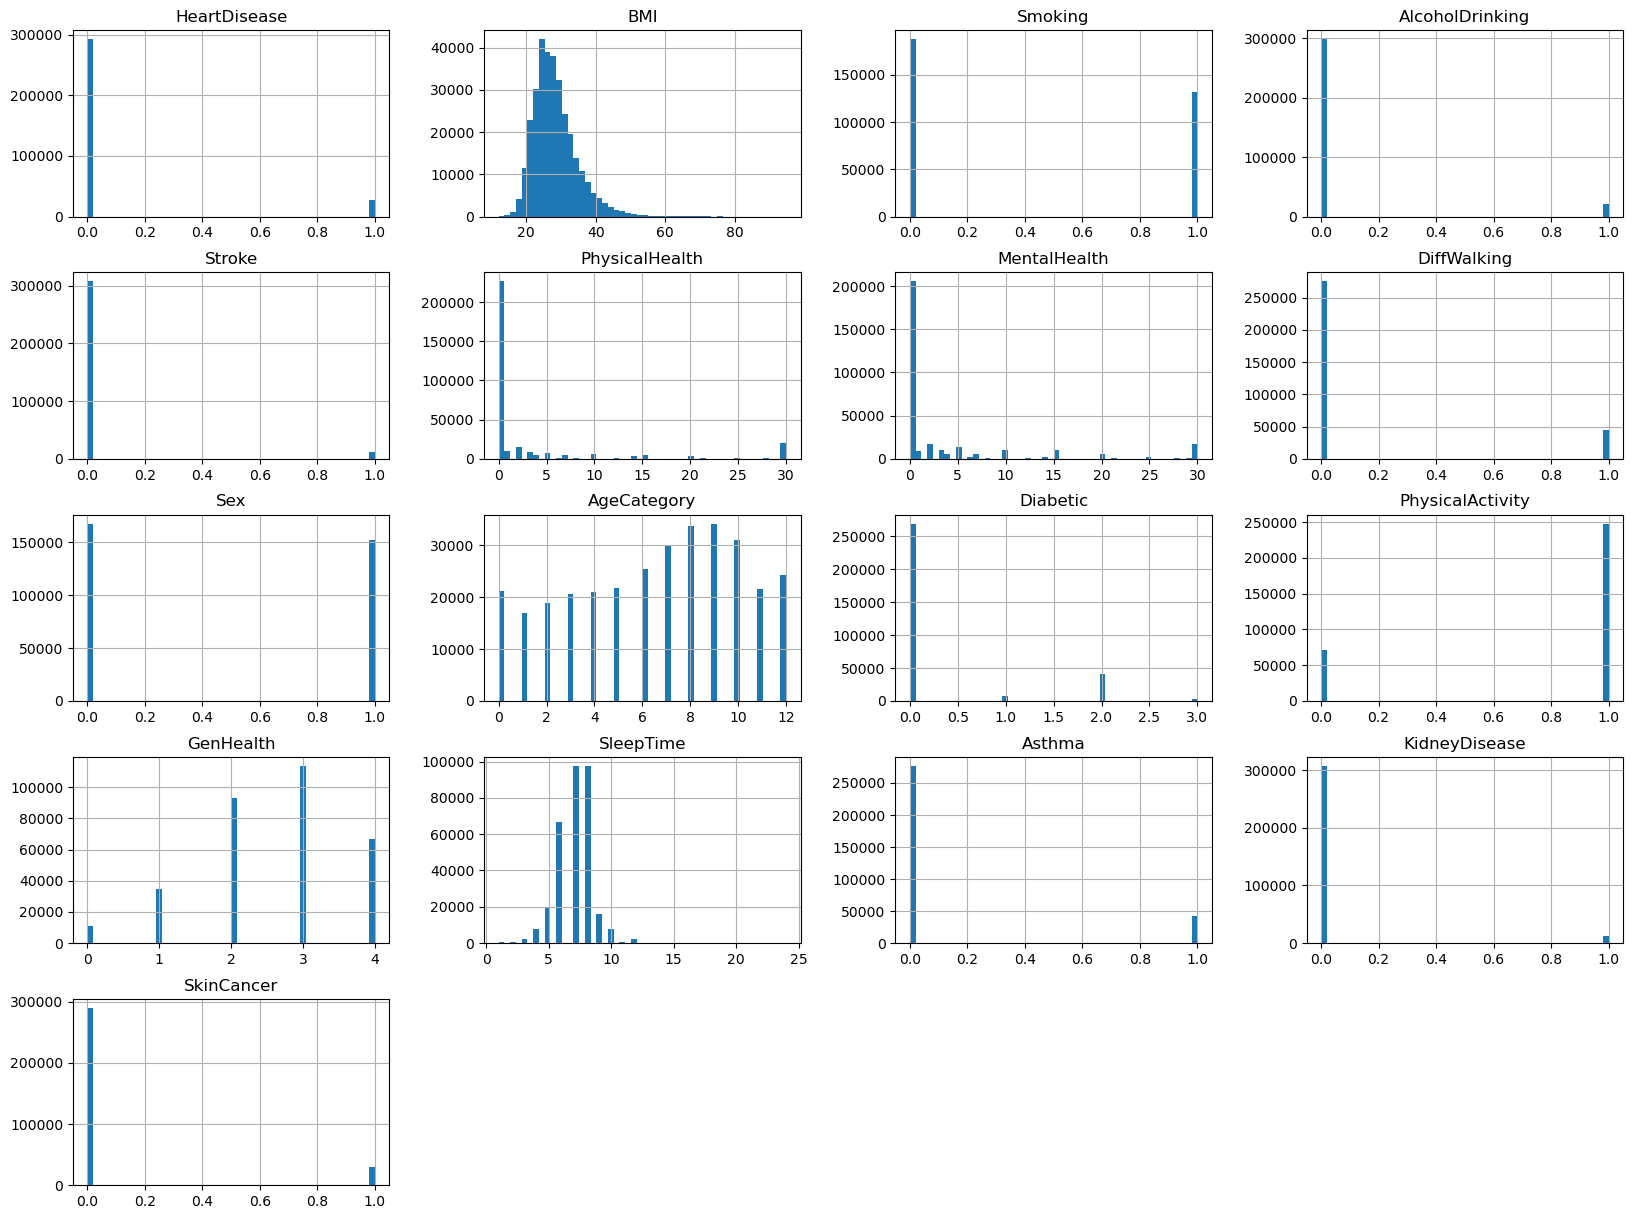

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
df_cat = df.copy()
df_cat['MentalHealth'] = np.select([df['MentalHealth'] <= 5, (df['MentalHealth'] > 5) & (df['MentalHealth'] <= 14)], [0, 1], default=2)
df_cat['PhysicalHealth'] = np.select([df['PhysicalHealth'] <= 5, (df['PhysicalHealth'] > 5) & (df['PhysicalHealth'] <= 14)], [0, 1], default=2)

In [22]:
df_cat.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,2,0,0,7,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,2,2,0,1,9,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,2,0,1,0,4,0,1,3,8.0,0,0,0


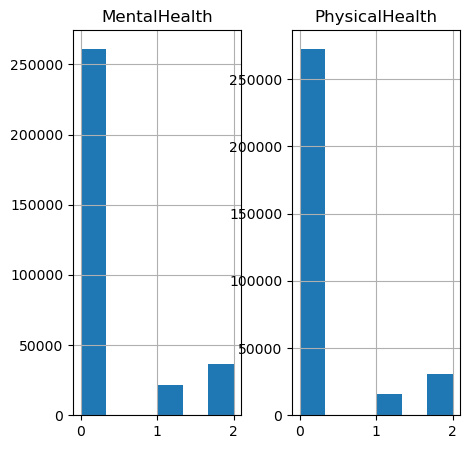

In [23]:
df_cat[['MentalHealth','PhysicalHealth']].hist(bins=6, figsize=(5,5))
plt.show()

In [24]:
df_cat.name = 'categorized mental & physical health'
datasets.append(df_cat)

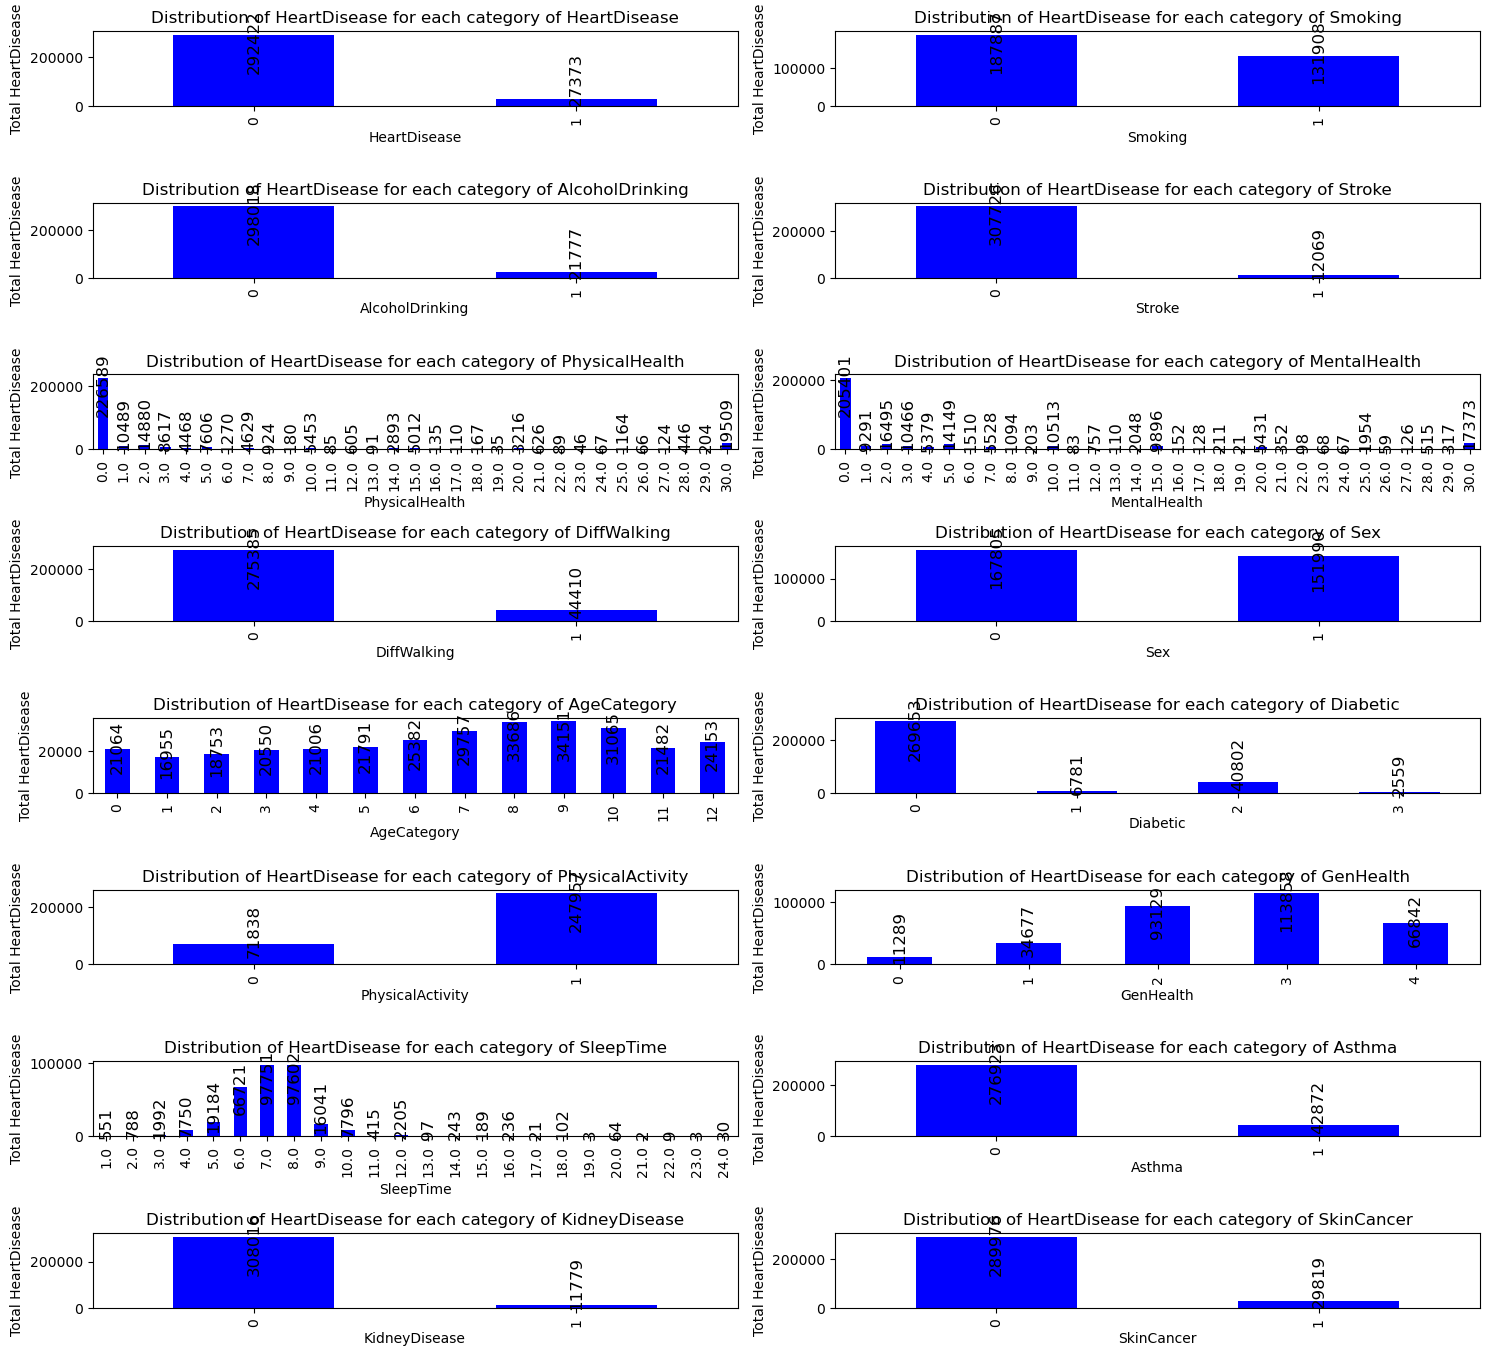

In [25]:
fig = plt.figure(figsize = (15,15))
for i, col in enumerate(categorical_data) :
  plt.subplot(len(categorical_data)//2+1, 2,i+1)
  df.groupby(col)['HeartDisease'].count().plot(kind='bar',color="blue")
  ax = fig.gca()
  plt.ylabel('Total HeartDisease')
  plt.tight_layout()
  #show total rented bike for each hist
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()/2),ha='center',size= 12, rotation=90)
      plt.tight_layout()
  plt.title('Distribution of HeartDisease for each category of ' + col)

## Correlation


<Axes: >

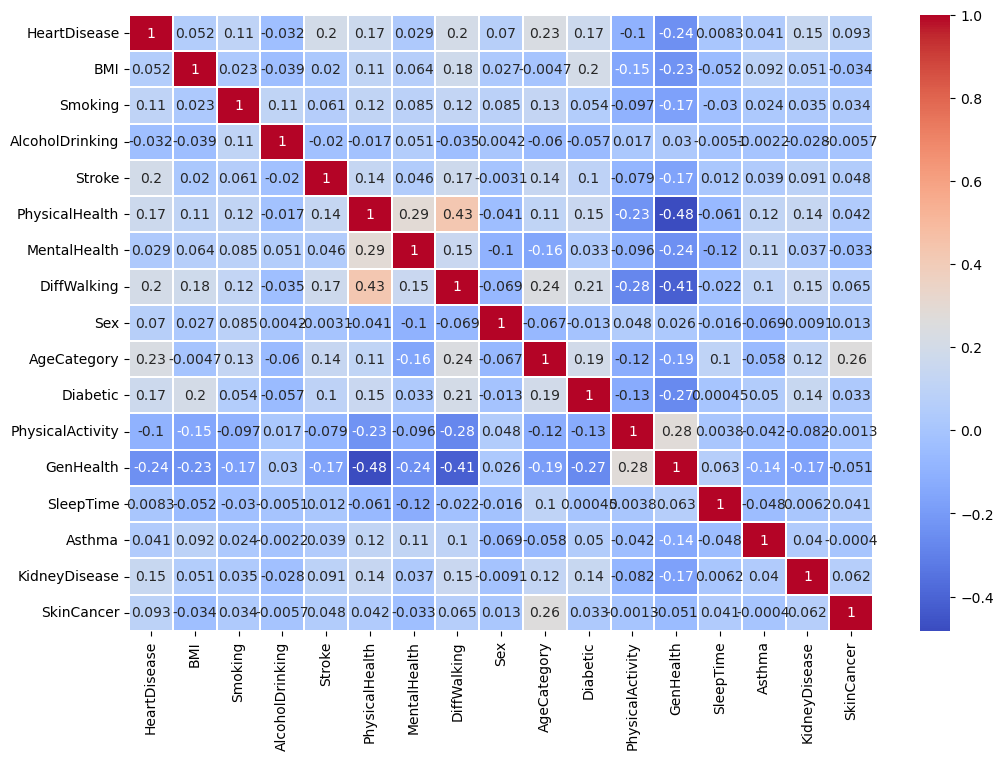

In [26]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [27]:
abs(corr['HeartDisease']).sort_values()

SleepTime           0.008327
MentalHealth        0.028591
AlcoholDrinking     0.032080
Asthma              0.041444
BMI                 0.051803
Sex                 0.070040
SkinCancer          0.093317
PhysicalActivity    0.100030
Smoking             0.107764
KidneyDisease       0.145197
Diabetic            0.168553
PhysicalHealth      0.170721
Stroke              0.196835
DiffWalking         0.201258
AgeCategory         0.233432
GenHealth           0.243182
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

In [28]:
#drop SleepTime, bad correlation with HeartDisease
df_bad_corr = df.drop('SleepTime', axis=1).copy()
df_bad_corr.name = 'without SleepTime'
datasets.append(df_bad_corr)

In [29]:
#drop SleepTime, bad correlation with HeartDisease for df_cat
df_bad_corr_cat = df_cat.drop('SleepTime', axis=1).copy()
df_bad_corr_cat.name = 'categorized without SleepTime'
datasets.append(df_bad_corr_cat)

### To much correlate:
GenHealt : PhysicalHealth => -0.48 \\
GenHealt : DiffWalking => -0.41 \\
DiffWalking : PhysicalHealth => 0.43 \\
### Medium correlate
MentalHealth : PhysicalHealth => 0.29 \\
GenHealt : PhysicalActivity => 0.28 \\

GenHealt has a better correlation with HeartDisease, so we dropped the others


In [30]:
df_corr = df.drop(['DiffWalking', 'PhysicalHealth'], axis=1).copy()
df_corr.name = "without 'DiffWalking', 'PhysicalHealth'"

<Axes: >

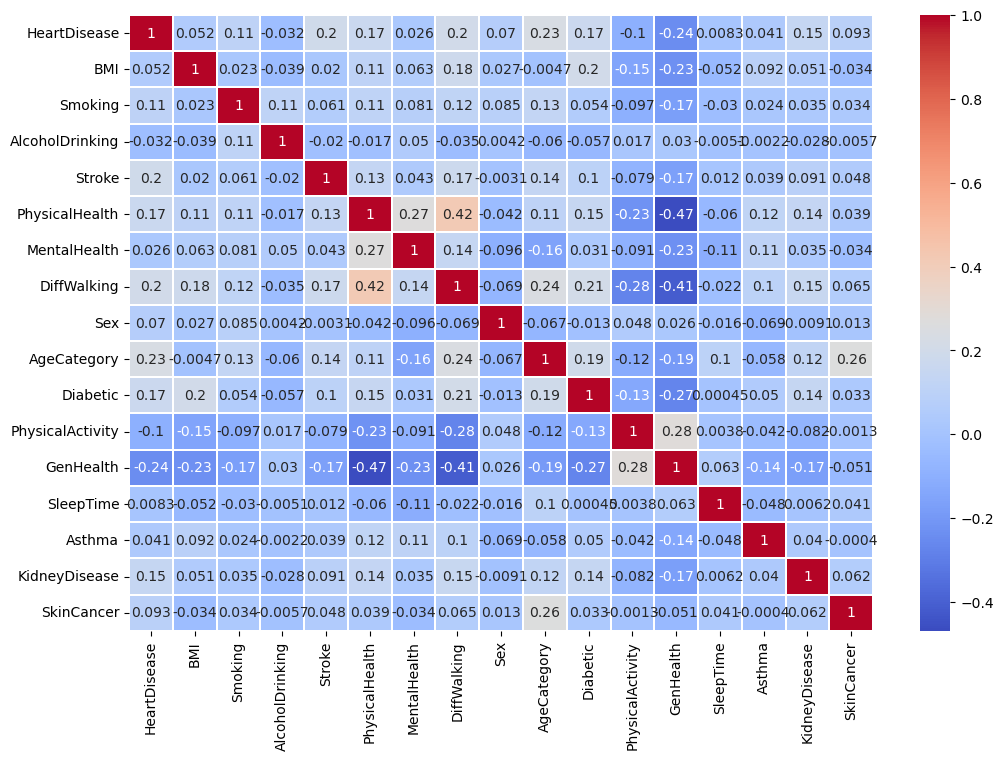

In [31]:
corr = df_cat.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [32]:
abs(corr['HeartDisease']).sort_values()

SleepTime           0.008327
MentalHealth        0.026439
AlcoholDrinking     0.032080
Asthma              0.041444
BMI                 0.051803
Sex                 0.070040
SkinCancer          0.093317
PhysicalActivity    0.100030
Smoking             0.107764
KidneyDisease       0.145197
PhysicalHealth      0.165833
Diabetic            0.168553
Stroke              0.196835
DiffWalking         0.201258
AgeCategory         0.233432
GenHealth           0.243182
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

In [33]:
df_cat_corr = df_cat.drop(['DiffWalking', 'PhysicalHealth'], axis=1).copy()
df_cat_corr.name = "categorized without 'DiffWalking', 'PhysicalHealth'"

In [34]:
datasets.append(df_corr)
datasets.append(df_cat_corr)

# Normalization

In [35]:
continuous_data = []
for col in df.columns:
  if len(df[col].unique()) > 35:
    continuous_data.append(col)
continuous_data

['BMI']

c:\Users\jules\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


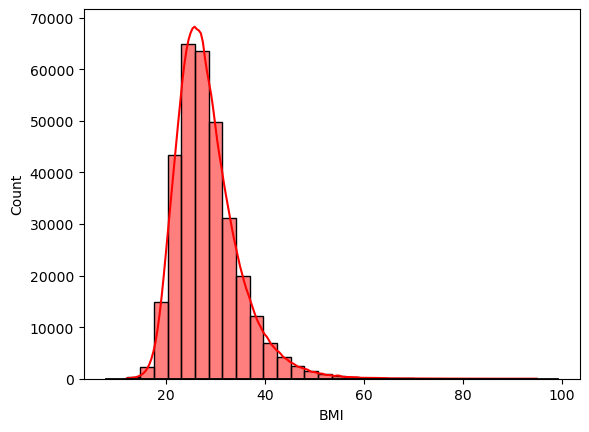

In [36]:
from scipy.stats import norm
data = df["BMI"]
# Plot the histogram with KDE
sns.histplot(data, kde=True, color='red', bins=30)
# Overlay the normal distribution
mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [37]:
def plot_normalize_method(col):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    data = df[col]
    # Original data
    sns.histplot(data, ax=axes[0], color='blue').set_title('Normal Data')
    # Log-transformed data
    sns.histplot(np.log1p(data + 0.0000001), ax=axes[1], color='red').set_title("log1p")
    # Square root-transformed data
    sns.histplot(np.sqrt(data), ax=axes[2], color='green').set_title("Square root")
    # Cube root-transformed data
    sns.histplot(np.cbrt(data * 2), ax=axes[3], color='purple').set_title("Cube root")
    plt.show()

c:\Users\jules\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jules\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jules\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jules\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

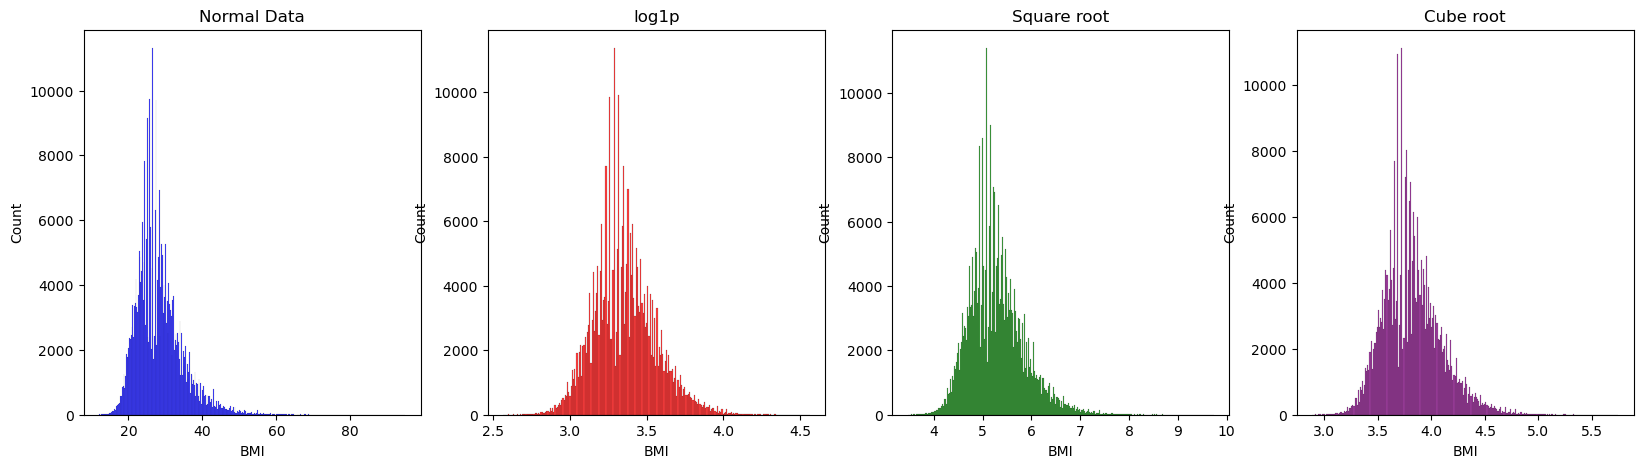

In [38]:
plot_normalize_method('BMI')

In [39]:
df_norm = df.copy()
df_norm['BMI'] = np.log1p(df_norm['BMI'] + 0.0000001)
df_norm.name = 'BMI normalized'
datasets.append(df_norm)

In [40]:
df_norm_cat = df_cat.copy()
df_norm_cat['BMI'] = np.log1p(df_norm_cat['BMI'] + 0.0000001)
df_norm_cat.name = 'data categorized & BMI normalized'
datasets.append(df_norm_cat)

In [41]:
df_norm_corr = df_corr.copy()
df_norm_corr['BMI'] = np.log1p(df_norm_corr['BMI'] + 0.0000001)
df_norm_corr.name = 'by correlation & BMI normalized'
datasets.append(df_norm_corr)

In [42]:
df_norm_bad_corr_cat = df_corr.copy()
df_norm_bad_corr_cat['BMI'] = np.log1p(df_norm_bad_corr_cat['BMI'] + 0.0000001)
df_norm_bad_corr_cat.name = 'categorized, without SleepTime and by correlation & BMI normalized'
datasets.append(df_norm_bad_corr_cat)

# First Prediction & Comparaison of Models


# Functions To Make Comparaison


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
from IPython.display import clear_output
from IPython.display import display, HTML

In [45]:
from sklearn.pipeline import Pipeline, make_pipeline
def customPipeline(model, scaler):
  return Pipeline(steps=[
          ('scale', scaler),
          ('model', model)
      ])

In [46]:
def modelEvaluation(dataset, model, test_size, scaler):
  X = dataset.drop('HeartDisease', axis=1).copy()
  Y = dataset['HeartDisease'].copy()
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,  random_state=42)
  #create my custom pipeline
  pipe = customPipeline(model, scaler)
  #fit data
  pipe.fit(x_train, y_train)
  #predict
  y_pred = pipe.predict(x_test)
  #get some information
  acc = round(accuracy_score(y_test, y_pred)*100,3)
  return pipe, y_pred, acc

In [47]:
def compareModel(datasets, models, test_sizes, scalers):
    dataset_names = []
    models_array = []
    scalers_array = []
    test_sizes_array = []
    acc_array = []

    i = 0
    total_iter = len(datasets)*len(scalers)*len(models)*len(test_sizes)

    for dataset in datasets:
      for m in models:
        print(str(m).split('()')[0])
        for s in scalers:
          for tz in test_sizes:
            display(HTML(f'<h2>Current Iteration: {i + 1}/{total_iter}</h2>'))
            _, _,acc = modelEvaluation(dataset,m,tz,s)
            dataset_names.append(dataset.name)
            models_array.append(str(m).split('()')[0])
            scalers_array.append(str(s).split('()')[0])
            test_sizes_array.append(tz)
            acc_array.append(acc)
            clear_output(wait=True)
            i += 1

    return pd.DataFrame({
        'dataset' : dataset_names,
        'model' : models_array,
        'scaler' : scalers_array,
        'test_size' : test_sizes_array,
        'accuracy in (%)' : acc_array})

### Our grid parameters


In [50]:
!pip install xgboost
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 14.1 MB/s eta 0:00:00


In [52]:
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Creating instances of classification models
models = [
    LogisticRegression(),
    #RidgeClassifier(),
    #SGDClassifier(),
    #SVC(),
    #NuSVC(),
    #LinearSVC(),
    DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #GradientBoostingClassifier(),
    #AdaBoostClassifier(),
    #BaggingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    #MultinomialNB(),
    #BernoulliNB(),
    #MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis()
]

AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

In [53]:
scalers = [None, StandardScaler() , MinMaxScaler()]
test_sizes = [0.1]

In [54]:
for dataset in datasets:
  print(dataset.name)

normal
categorized mental & physical health
without SleepTime
categorized without SleepTime
without 'DiffWalking', 'PhysicalHealth'
categorized without 'DiffWalking', 'PhysicalHealth'
BMI normalized
data categorized & BMI normalized
by correlation & BMI normalized
categorized, without SleepTime and by correlation & BMI normalized


In [55]:
df_compare = compareModel(datasets, models, test_sizes, scalers)

NameError: name 'models' is not defined

In [56]:
df_compare.sort_values(by='accuracy in (%)', ascending=False).head(20)

NameError: name 'df_compare' is not defined

In [57]:
test_sizes = [0.1, 0.2]
df_compareV2 = compareModel([df_bad_corr], models, test_sizes, scalers)

NameError: name 'models' is not defined

# Modeling

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


param_grid = {'n_clusters': [3, 4, 5, 6, 7]} 

# Creation of KMeans Model
kmeans = KMeans(random_state=42)

grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(df_scaled)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score (inertie):", grid_search.best_score_)

best_kmeans = grid_search.best_estimator_
df['cluster'] = best_kmeans.predict(df_scaled)

print(df['cluster'].value_counts())

c:\Users\jules\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jules\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jules\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jules\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jules\anaconda3\lib\site-packages\sklearn\clust

Meilleurs paramètres: {'n_clusters': 7}
Meilleur score (inertie): -1006271.8269493768
cluster
4    46633
2    45710
0    45705
3    45682
1    45460
5    45421
6    45389
Name: count, dtype: int64
